In [1]:
#Observations
#
# My first observation is that the mice that were treated with Capomulin had the greatest decrease of tumor volume.
# The most used drugs were Capomulin and Ramicane, they also were the most affective against tumor volume.
# My final observation is that the correlation between mouse weight and the average tumor volume is 0.84.
#

In [2]:
#OBSERVATION & INSIGHTS
#Chloe Valverde
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(mouse_results_df['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_results_df[mouse_results_df.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#nah

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#SUMMERY STATISTICS  mouse_results_df
#-----------------------------------------------------------

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use GROUPBY and summary statistical methods to calculate the following properties of each DRUG REGIMEN: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = mouse_results_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].mean() 
mouse_median = mouse_results_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_variance = mouse_results_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].var() 
mouse_std = mouse_results_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].std() 
mouse_sem = mouse_results_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].sem() 

# Assemble the resulting series into a single summary dataframe.
mouse_stats = pd.DataFrame([mouse_mean, mouse_std, mouse_sem, mouse_variance, mouse_median]) 
mouse_stats 

print(mouse_mean) 
print(mouse_stats) 

mouse_stats.index = ['mean', 'std', 'sem', 'var', 'median'] 
mouse_stats

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen        Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol  \
Tumor Volume (mm3)  40.675741  52.591172  52.884795  55.235638  54.331565   
Tumor Volume (mm3)   4.994774   6.268188   6.567243   8.279709   8.134708   
Tumor Volume (mm3)   0.329346   0.469821   0.492236   0.603860   0.596466   
Tumor Volume (mm3)  24.947764  39.290177  43.128684  68.553577  66.173479   
Tumor Volume (mm3)  41.557809  51.776157  51.820584  53.698743  52.509285   

Drug Regimen          Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Tumor Volume (mm3)  54.033581  52.393463  40.216745  54.233149  53.236507  
Tumor Volume (mm3)   7.821003   6.568014   4.846308   7.710419   6.966589  
Tumor Volume (mm3)   0.58

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.393463,40.216745,54.233149,53.236507
std,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.568014,4.846308,7.710419,6.966589
sem,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.525862,0.320955,0.573111,0.516398
var,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.138803,23.486704,59.450562,48.533355
median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.909965,40.673236,52.431737,51.818479


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).T


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.393463,40.216745,54.233149,53.236507
median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.909965,40.673236,52.431737,51.818479
var,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.138803,23.486704,59.450562,48.533355
std,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.568014,4.846308,7.710419,6.966589
sem,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.525862,0.320955,0.573111,0.516398


In [11]:
#BAR AND PIE CHARTS mouse_results_df
#---------------------------------------------------------------

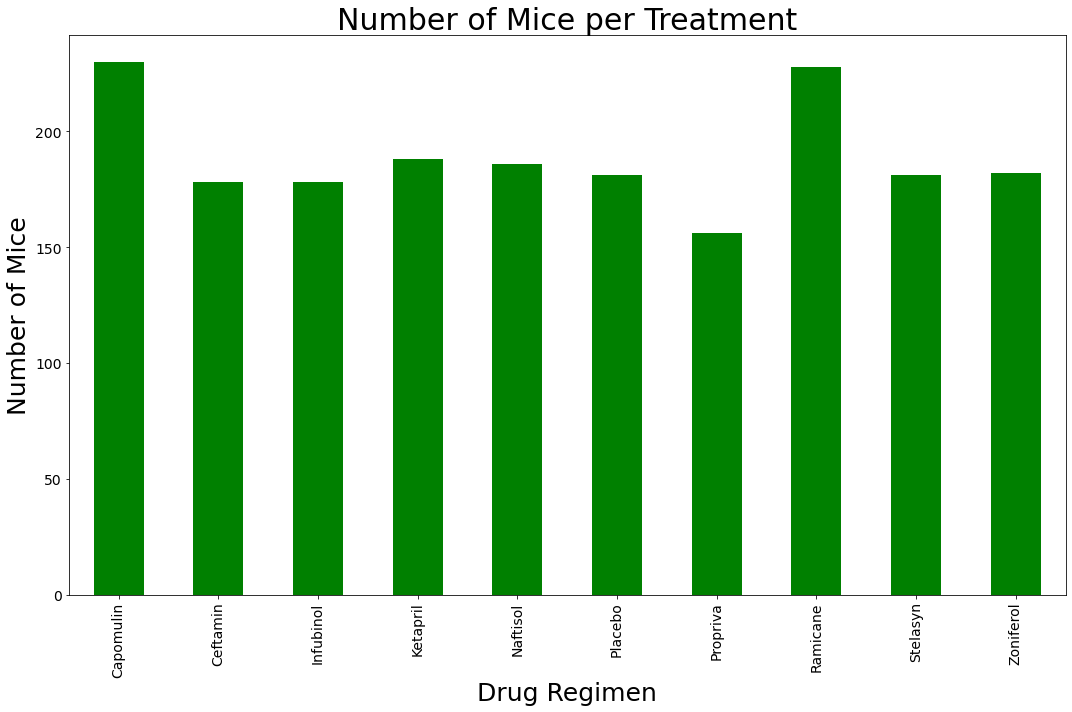

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#should be 2 plots according to README
#Create the first bar plot by using Pandas's `DataFrame.plot()` method.

mouseTime = mouse_results_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = mouseTime.plot.bar(figsize=(15,10), color='g',fontsize = 14)
mouseTime
plt.xlabel("Drug Regimen",fontsize = 25)
plt.ylabel("Number of Mice",fontsize = 25)
plt.title("Number of Mice per Treatment",fontsize = 30)

plt.tight_layout()
plt.show()

mouseTime

Text(0, 0.5, 'Number of Mice')

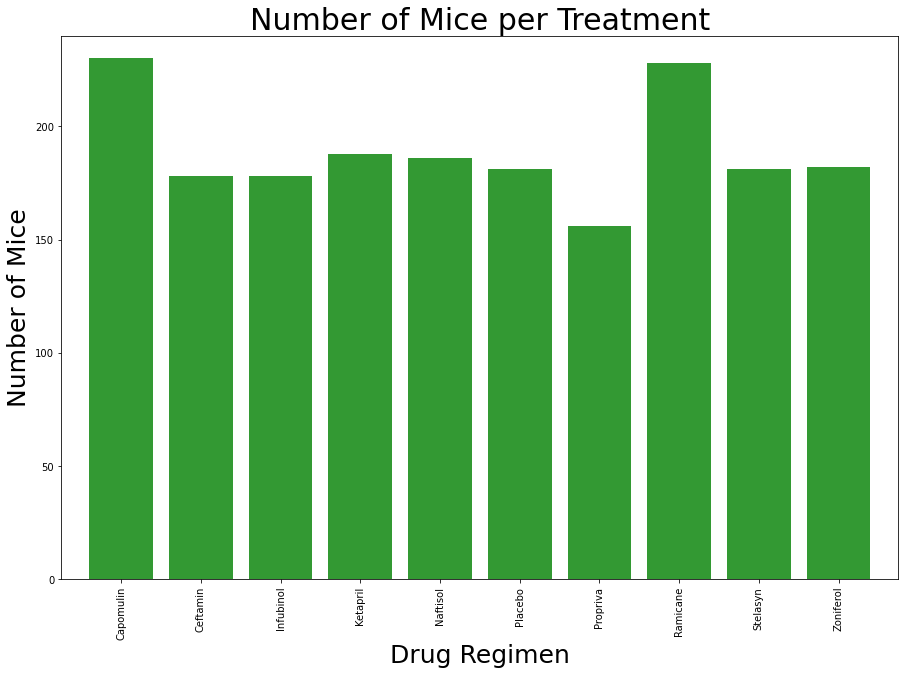

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#mouse_results_df

mouseTime2 =(mouse_results_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(mouseTime))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mouseTime2, color='g', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouseTime2)+10)
plt.title("Number of Mice per Treatment",fontsize = 30)
plt.xlabel("Drug Regimen",fontsize = 25)
plt.ylabel("Number of Mice",fontsize = 25)


,Total Count
Male,125
Female,124


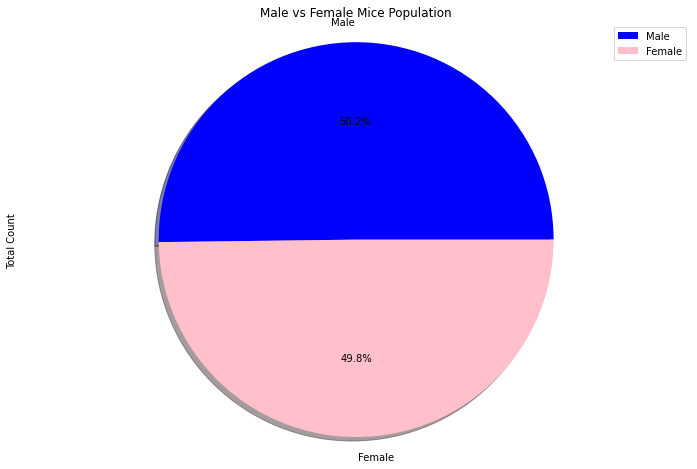

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create the first pie plot by using both Pandas's `DataFrame.plot()`.mouse_results_df
gender_rows = mouse_results_df.loc[:, ["Sex", "Mouse ID"]]
gender_rows = gender_rows.drop_duplicates()
gender_count = gender_rows["Sex"].value_counts()

gender_data = pd.DataFrame({"Total Count": gender_count})

colors = ["blue", "pink"]
pandas_pie = gender_data.plot(kind="pie", figsize=(12,8), colors=colors, y="Total Count", title="Male vs Female Mice Population",
                              startangle=0, shadow=True, autopct="%1.1f%%")
plt.axis("equal")

gender_data

,Total Count
Male,125
Female,124


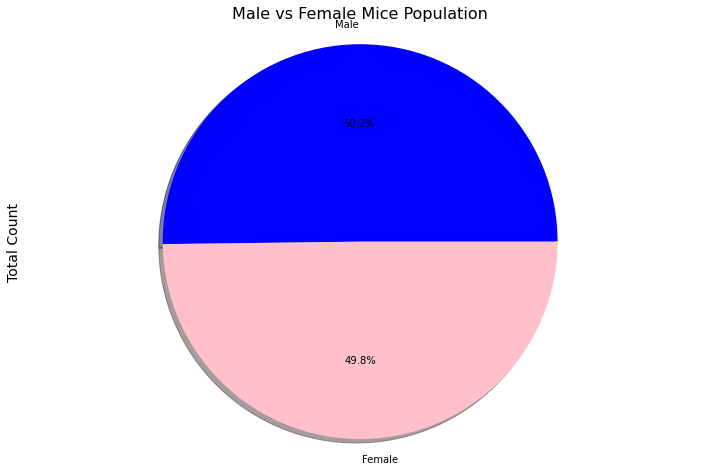

In [15]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create the second pie plot by using Matplotlib's `pyplot` methods.
gender_rows = mouse_results_df.loc[:, ["Sex", "Mouse ID"]]
gender_rows = gender_rows.drop_duplicates()
gender_count = gender_rows["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "pink"]
fig1, ax1 = plt.subplots(figsize=(12, 8))

plt.title("Male vs Female Mice Population",fontsize = 16)
plt.ylabel("Total Count",fontsize = 14)
plt.pie(gender_count, labels=labels, colors=colors, startangle=0, shadow=True, autopct="%1.1f%%")

plt.axis("equal")

gender_data

In [16]:
#QUARTILES, OUTLIERS, BOXPLOTS
#--------------------------------------------------------------

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin   mouse_results_df

DrugList = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

max_timepoint = mouse_results_df.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

mouse_combined_df = max_timepoint.merge(mouse_results_df,on=['Mouse ID','Timepoint'],how="left")
mouse_combined_df = mouse_combined_df[mouse_combined_df['Drug Regimen'].isin(DrugList)]

mouse_combined_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [18]:
# Put treatments into a list for FOR loop (and later for plot labels)mouse_results_df
drugList  = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with TUMOR VOL DATA (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in DrugList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_drug_df  = mouse_combined_df.loc[mouse_combined_df["Drug Regimen"] == drug,
                                                                    'Tumor Volume (mm3)']
 
    # add subset 
    tumor_vol_list.append(filtered_drug_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = filtered_drug_df .quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = filtered_drug_df .loc[(filtered_drug_df  < lower_bound) | (filtered_drug_df  > upper_bound)]

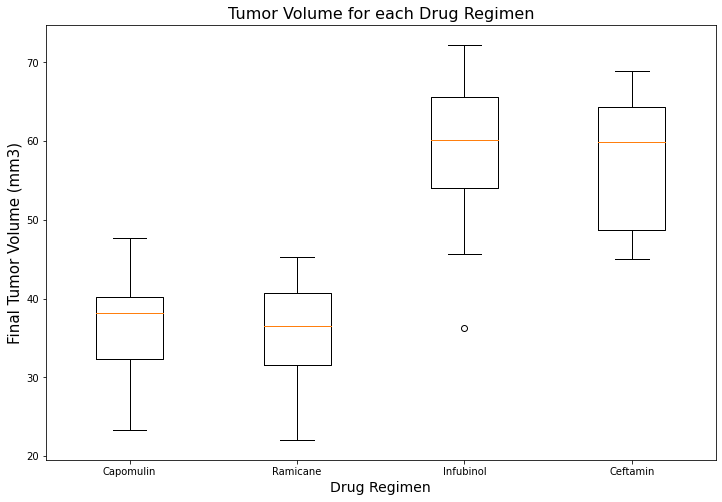

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 15)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(tumor_vol_list, labels=drugList, widths = 0.4, vert=True)

plt.show()

In [20]:
#LINES AND SCATTER PLOTS
#-----------------------------------------------------------------------

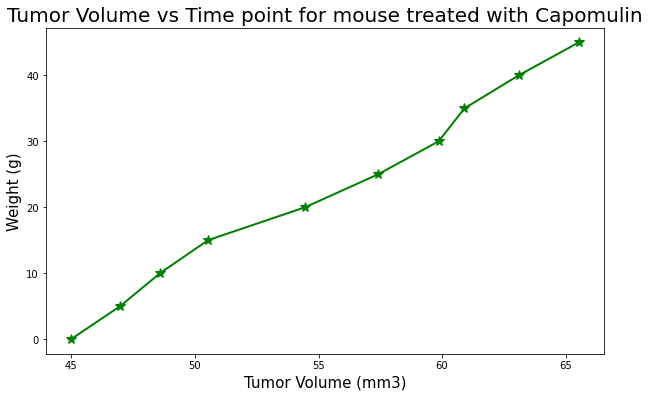

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin mouse_results_df
#chose random mouse for study. Mouse #1 was chosen.
capo_df = mouse_results_df.loc[mouse_results_df["Drug Regimen"]=='Capomulin']
subject = mouse_results_df.loc[mouse_results_df["Mouse ID"]=='a251']

x_axis = subject["Tumor Volume (mm3)"]
y_axis = subject["Timepoint"]
plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis, linewidth=2,color='g', markersize=10,marker="*")

plt.title("Tumor Volume vs Time point for mouse treated with Capomulin",fontsize =20)
plt.xlabel("Tumor Volume (mm3)", fontsize =15)
plt.ylabel("Weight (g)", fontsize =15)

plt.show()

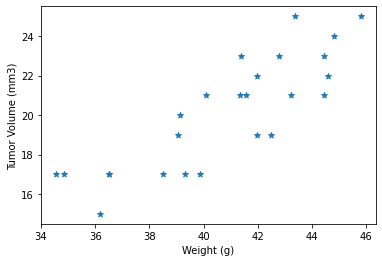

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capoID_df = capo_df.groupby(['Mouse ID'])

capoID_tvmean_df = capoID_df['Tumor Volume (mm3)'].mean()
capo_wtmean_df = capoID_df['Weight (g)'].mean()

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(capoID_tvmean_df,capo_wtmean_df, marker='*')

plt.show()

In [23]:
#CORRELATION AND REGRESSION  
#-----------------------------------------------------------------------

The correlation between mouse weight and the average tumor volume is 0.84


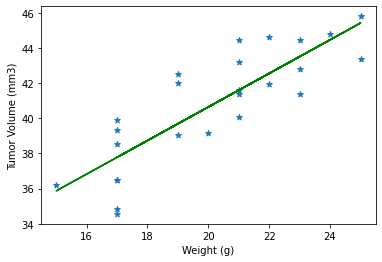

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen mouse_results_df

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(capo_wtmean_df, capoID_tvmean_df,marker='*')

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_wtmean_df, capoID_tvmean_df)

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")

# Create the line for the regression data and plot them
thatSlope = slope * capo_wtmean_df + intercept
plt.plot(capo_wtmean_df,thatSlope,'-', color='g');